# Plot drone

## Loading modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
linearized_inputs = {
    'z': 'f',
    'phi': 'm_x',
    'theta': 'm_y',
    'psi': 'm_z'
}

var_labels = {
    'x': 'x', 'y': 'y', 'z':'z', 'theta': '\\theta', 'phi': '\\phi', 'psi': '\\psi',
    'f': 'f', 'm_x': 'm_x', 'm_y': 'm_y', 'm_z': 'm_z'
}

In [22]:
import re

In [28]:
re.sub('([d])', '', 'ddtheta')

'theta'

## Functions

In [37]:
def time_plot(variables, sim_out, title:str=None, filename:str=None):
    fig, axes = plt.subplots(len(variables),1,figsize=(19.20,10.80))
    for i, zipped in enumerate(zip(axes, variables)):
        lines = list()
        ax, var = zipped
        ax.grid()
        base_name = var.replace('d', '')
        base_label = var.replace(base_name, var_labels[base_name])
        ylabel = f'${base_label}$'
        lines += ax.plot(sim_out['t'], sim_out[var], label=f'${base_label}$')
        ref_name = f'ref_{var}'
        if ref_name in sim_out.columns:
            r_label = f'$r_{{{base_label}}}$'
            lines += ax.plot(sim_out['t'], sim_out[ref_name], label=r_label, linestyle='--', color='r')
            ylabel += f', {r_label}'
        
        input_name = f'u_{var}'
        if input_name in sim_out.columns:
            input_label = f'$u_{{{base_label}}}$'
            lines += ax.plot(sim_out['t'], sim_out[input_name], label=input_label, color='C1')
            # ylabel += f', ${input_name}$' if var == 'z' else f', $u_{{\\{var}}}$'
            ylabel += f', {input_label}'
        
        if var in linearized_inputs.keys():
            twinx = ax.twinx()
            input_name = linearized_inputs[var]
            input_label = f'${var_labels[input_name]}$'
            lines += twinx.plot(sim_out['t'], sim_out[input_name], label=input_label, color='C2')
            twinx.set_ylabel(input_label)
        
        labels = [l.get_label() for l in lines]  
        ax.legend(lines, labels)
        
        if i < len(variables)-1:
            ax.set(xticklabels=[], ylabel=ylabel)
        else:
            ax.set(ylabel=ylabel, xlabel='Time (seconds)')
    
    if title is not None:
        fig.suptitle(title, fontsize='large')
    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, dpi=72, transparent=False, facecolor='white')
    
    return fig, axes

def state_space_plot(x, y, sim_out, title:str=None, filename:str=None):
    fig, ax = plt.subplots(1,1,figsize=(19.20,10.80))
    ax.grid()
    ax.plot(sim_out[x], sim_out[y])
    ax.set(xlabel=x, ylabel=y)

    if title is not None:
        fig.suptitle(title, fontsize='large')
    fig.tight_layout()

    if filename is not None:
        fig.savefig(filename, dpi=72, transparent=False, facecolor='white')
    return fig, ax

## Loading data

In [31]:
filename = '../drone_sim_out.csv'
sim_out = pd.read_csv(filename, index_col=0, dtype=float)
sim_out

,t,phi,dphi,theta,dtheta,psi,dpsi,x,dx,y,...,u_theta,u_psi,f,m_x,m_y,m_z,f1,f2,f3,f4
0.0,0.0000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.091413,0.000000e+00,0.110000,-0.274370,0.091413,0.000000e+00,0.013924,-0.141815,0.105337,0.132554
1.0,0.0001,-1.371761e-09,-0.000027,4.570527e-10,0.000009,8.231072e-26,7.994944e-22,4.189677e-18,1.675861e-13,1.257473e-17,...,0.091405,-7.995767e-22,0.109999,-0.274317,0.091405,-7.995767e-22,0.013933,-0.141794,0.105338,0.132523
2.0,0.0011,-1.658776e-07,-0.000301,5.528663e-08,0.000101,3.124285e-25,-1.640204e-21,6.132658e-14,2.229913e-10,1.840263e-13,...,0.091322,1.639892e-21,0.109989,-0.273794,0.091322,1.639892e-21,0.014022,-0.141585,0.105344,0.132209
3.0,0.0111,-1.678371e-05,-0.003013,5.612591e-06,0.001010,5.423086e-22,5.856370e-20,6.343709e-10,2.284520e-07,1.899804e-09,...,0.090491,-5.910601e-20,0.109889,-0.268607,0.090491,-5.910601e-20,0.014907,-0.139511,0.105398,0.129095
4.0,0.0211,-6.026283e-05,-0.005674,2.021904e-05,0.001910,2.077543e-21,1.511622e-19,8.263287e-09,1.564542e-06,2.469762e-08,...,0.089660,-1.532397e-19,0.109789,-0.263495,0.089660,-1.532397e-19,0.015782,-0.137466,0.105443,0.126030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998.0,9.9611,-2.880789e-01,-0.000242,9.622346e-02,0.000954,1.261175e-18,5.288503e-20,3.858623e+01,8.683940e+00,9.793111e+01,...,-0.001083,-1.314060e-18,0.104703,0.000130,-0.001083,-1.314060e-18,0.078950,-0.025991,0.077866,-0.026122
999.0,9.9711,-2.880813e-01,-0.000240,9.623294e-02,0.000943,1.261671e-18,4.360186e-20,3.867312e+01,8.693585e+00,9.817003e+01,...,-0.001083,-1.305272e-18,0.104703,0.000131,-0.001083,-1.305272e-18,0.078950,-0.025991,0.077867,-0.026122
1000.0,9.9811,-2.880837e-01,-0.000239,9.624232e-02,0.000932,1.261978e-18,3.815795e-20,3.876010e+01,8.703232e+00,9.840925e+01,...,-0.001081,-1.300136e-18,0.104703,0.000132,-0.001081,-1.300136e-18,0.078950,-0.025991,0.077868,-0.026123
1001.0,9.9911,-2.880860e-01,-0.000238,9.625158e-02,0.000921,1.262575e-18,6.264577e-20,3.884718e+01,8.712879e+00,9.864877e+01,...,-0.001080,-1.325221e-18,0.104704,0.000133,-0.001080,-1.325221e-18,0.078950,-0.025991,0.077869,-0.026124


## Drone positions over time

(<Figure size 1920x1080 with 4 Axes>,
 array([<AxesSubplot:ylabel='$x$, $r_x$'>,
        <AxesSubplot:ylabel='$y$, $r_y$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$z$, $r_z$, $u_z$'>],
       dtype=object))

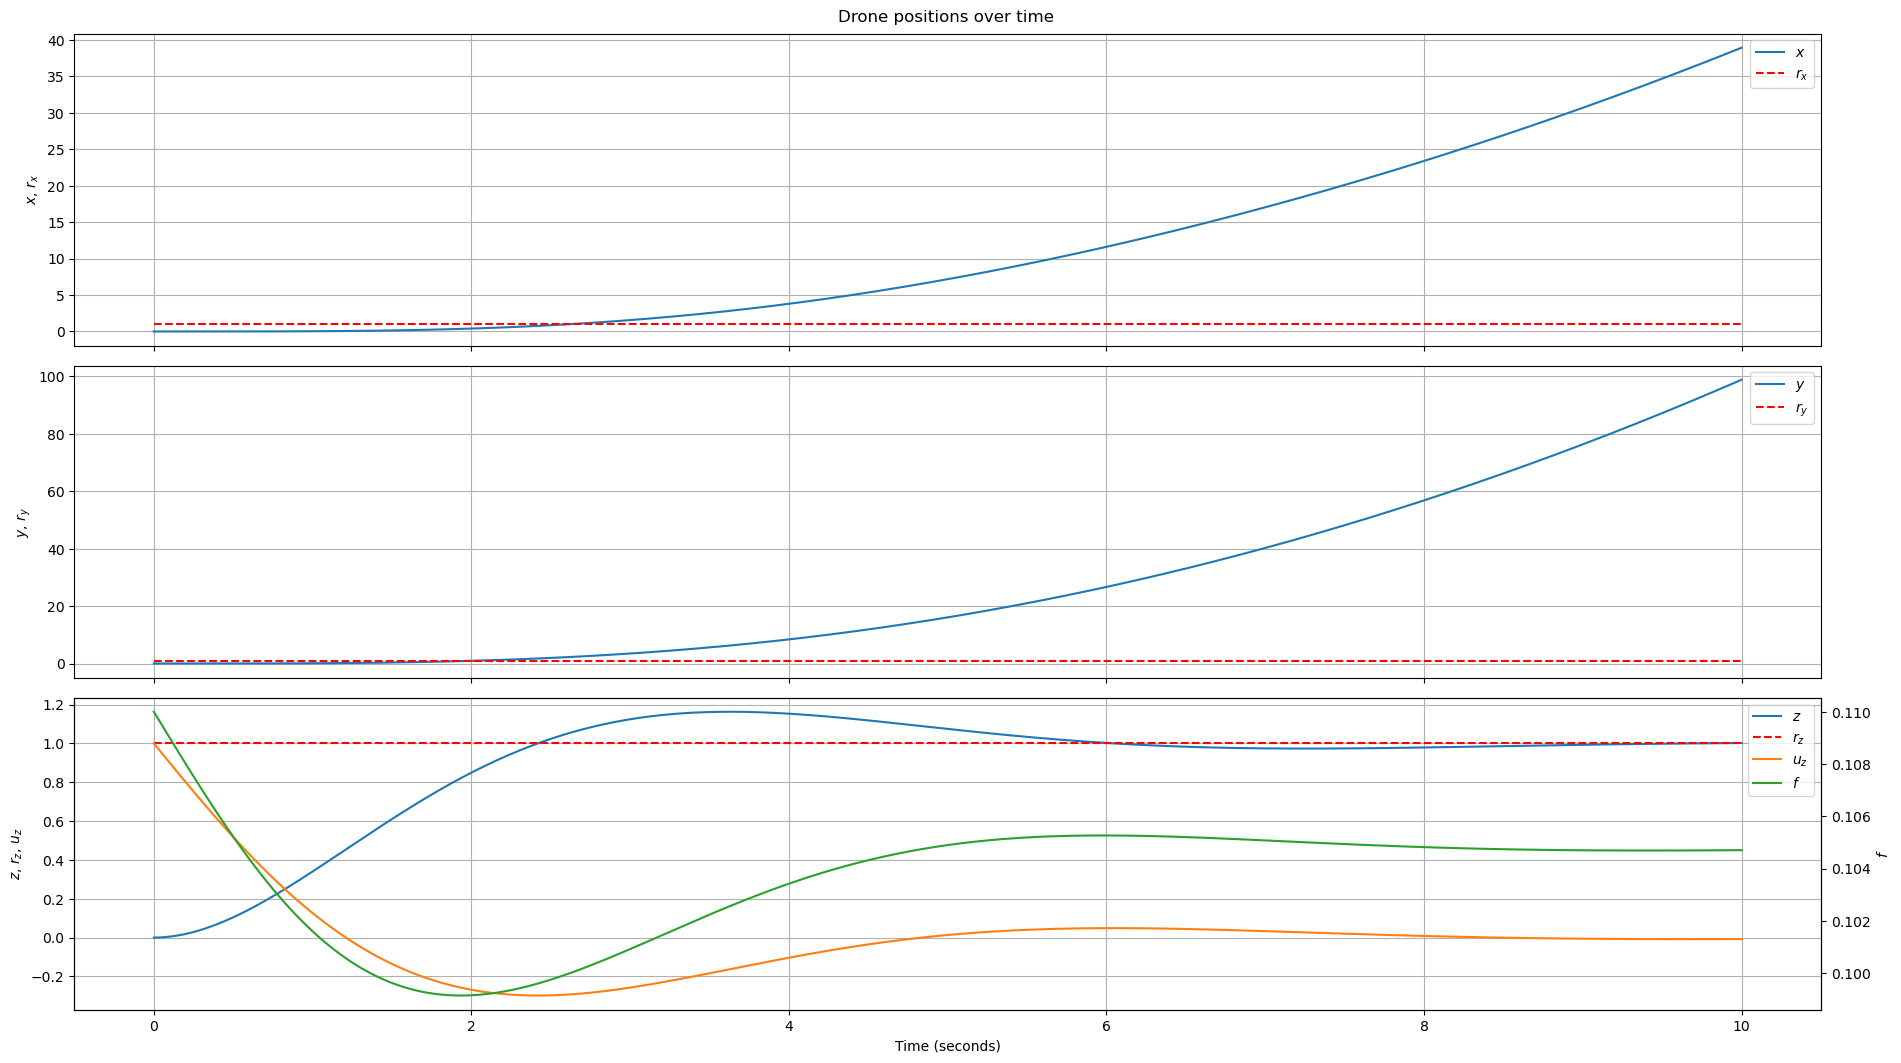

In [34]:
time_plot(['x', 'y', 'z'], sim_out, title='Drone positions over time')

## Drone directions over time

(<Figure size 1920x1080 with 6 Axes>,
 array([<AxesSubplot:ylabel='$\\phi$, $r_\\phi$, $u_\\phi$'>,
        <AxesSubplot:ylabel='$\\theta$, $r_\\theta$, $u_\\theta$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$\\psi$, $r_\\psi$, $u_\\psi$'>],
       dtype=object))

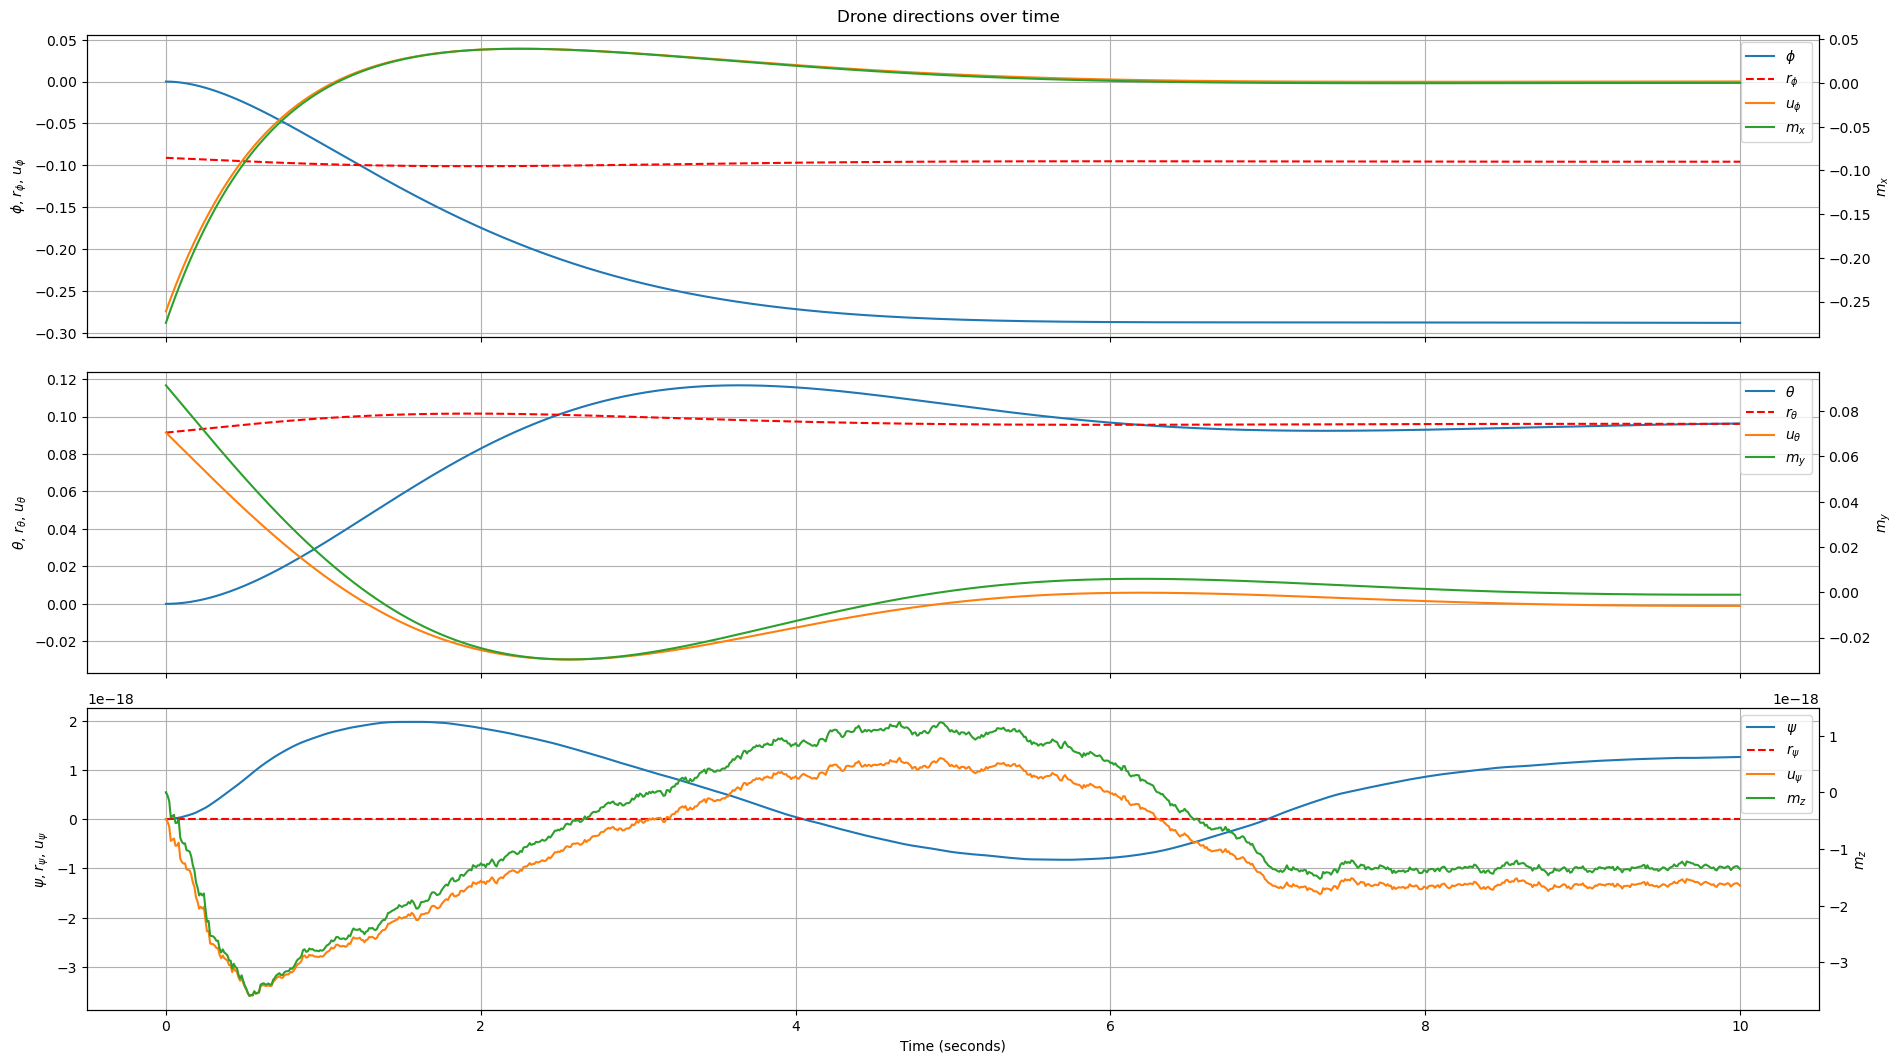

In [35]:
time_plot(['phi', 'theta', 'psi'], sim_out, title='Drone directions over time')

## Drone diff positions over time

(<Figure size 1920x1080 with 3 Axes>,
 array([<AxesSubplot:ylabel='$dx$'>, <AxesSubplot:ylabel='$dy$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$dz$, $r_{dz}$'>],
       dtype=object))

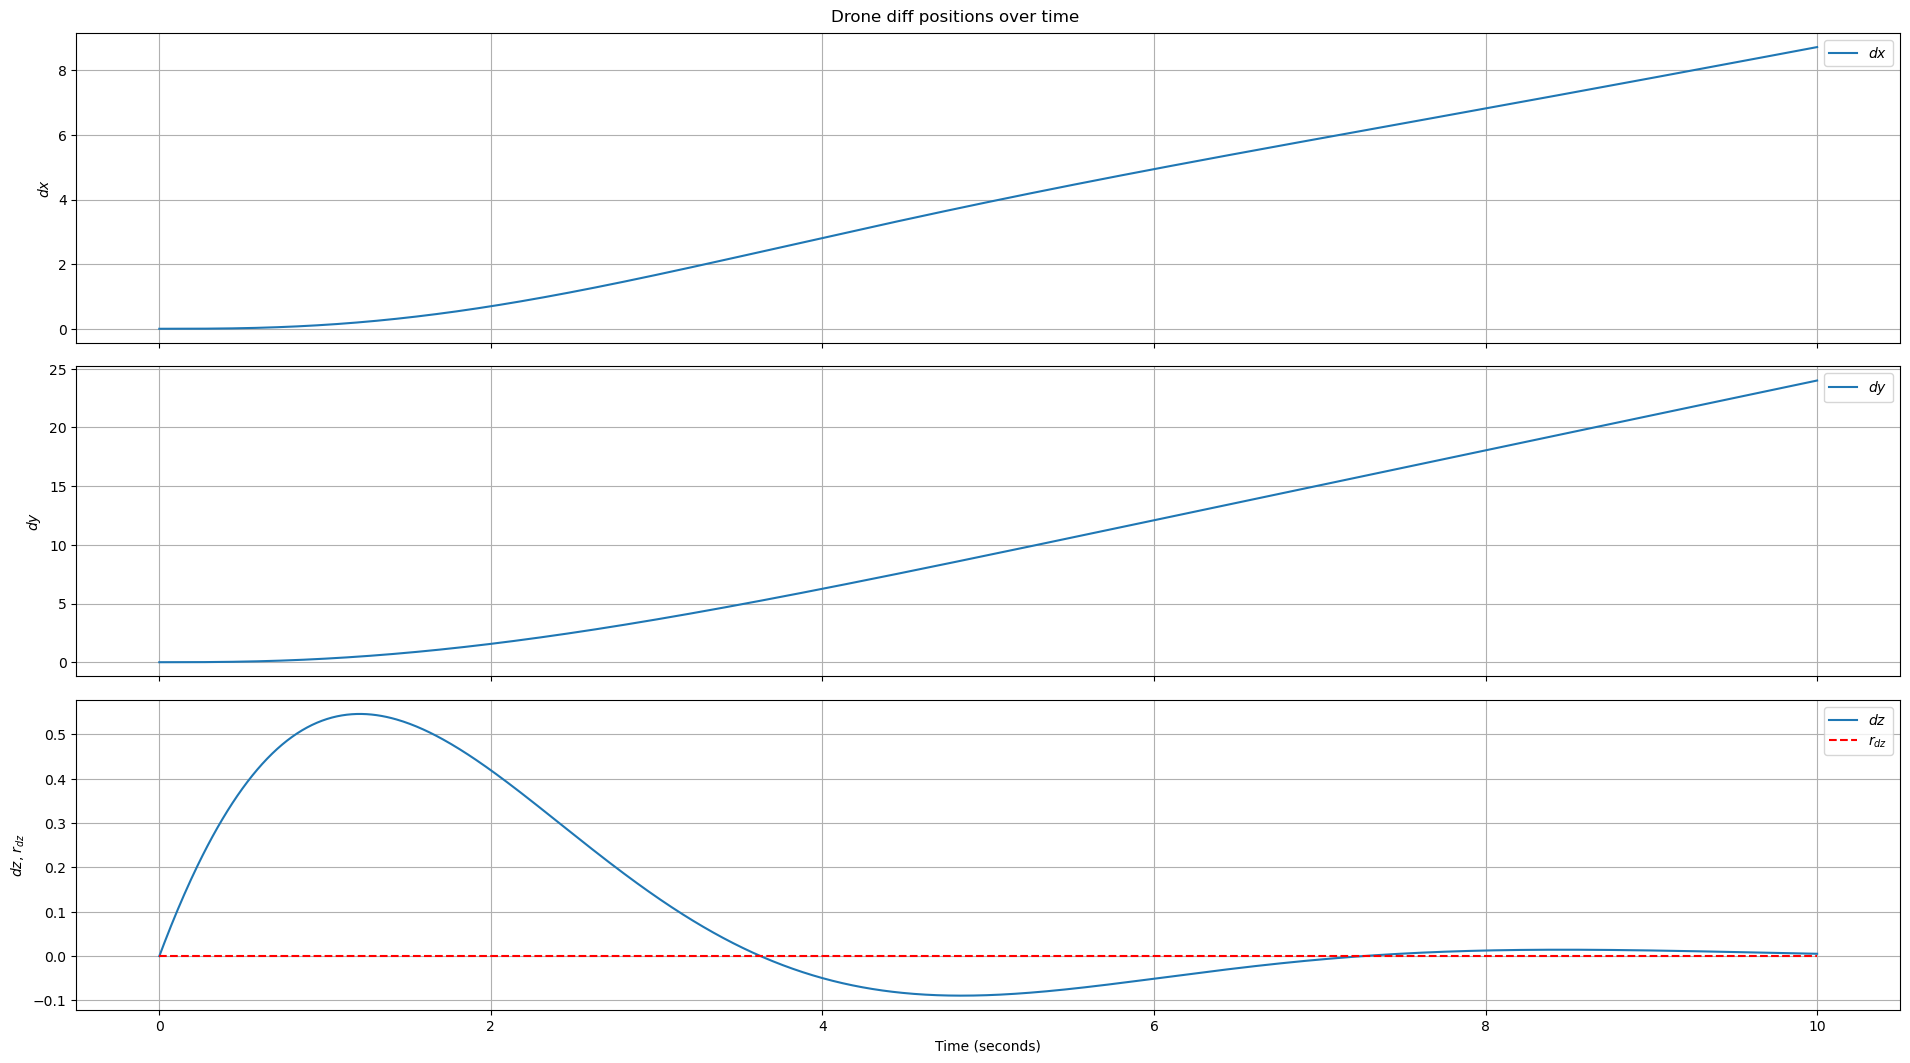

In [38]:
time_plot(['dx', 'dy', 'dz'], sim_out, title='Drone diff positions over time')

## Drone diff directions over time

(<Figure size 1920x1080 with 3 Axes>,
 array([<AxesSubplot:ylabel='$d\\phi$, $r_{d\\phi}$'>,
        <AxesSubplot:ylabel='$d\\theta$, $r_{d\\theta}$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$d\\psi$, $r_{d\\psi}$'>],
       dtype=object))

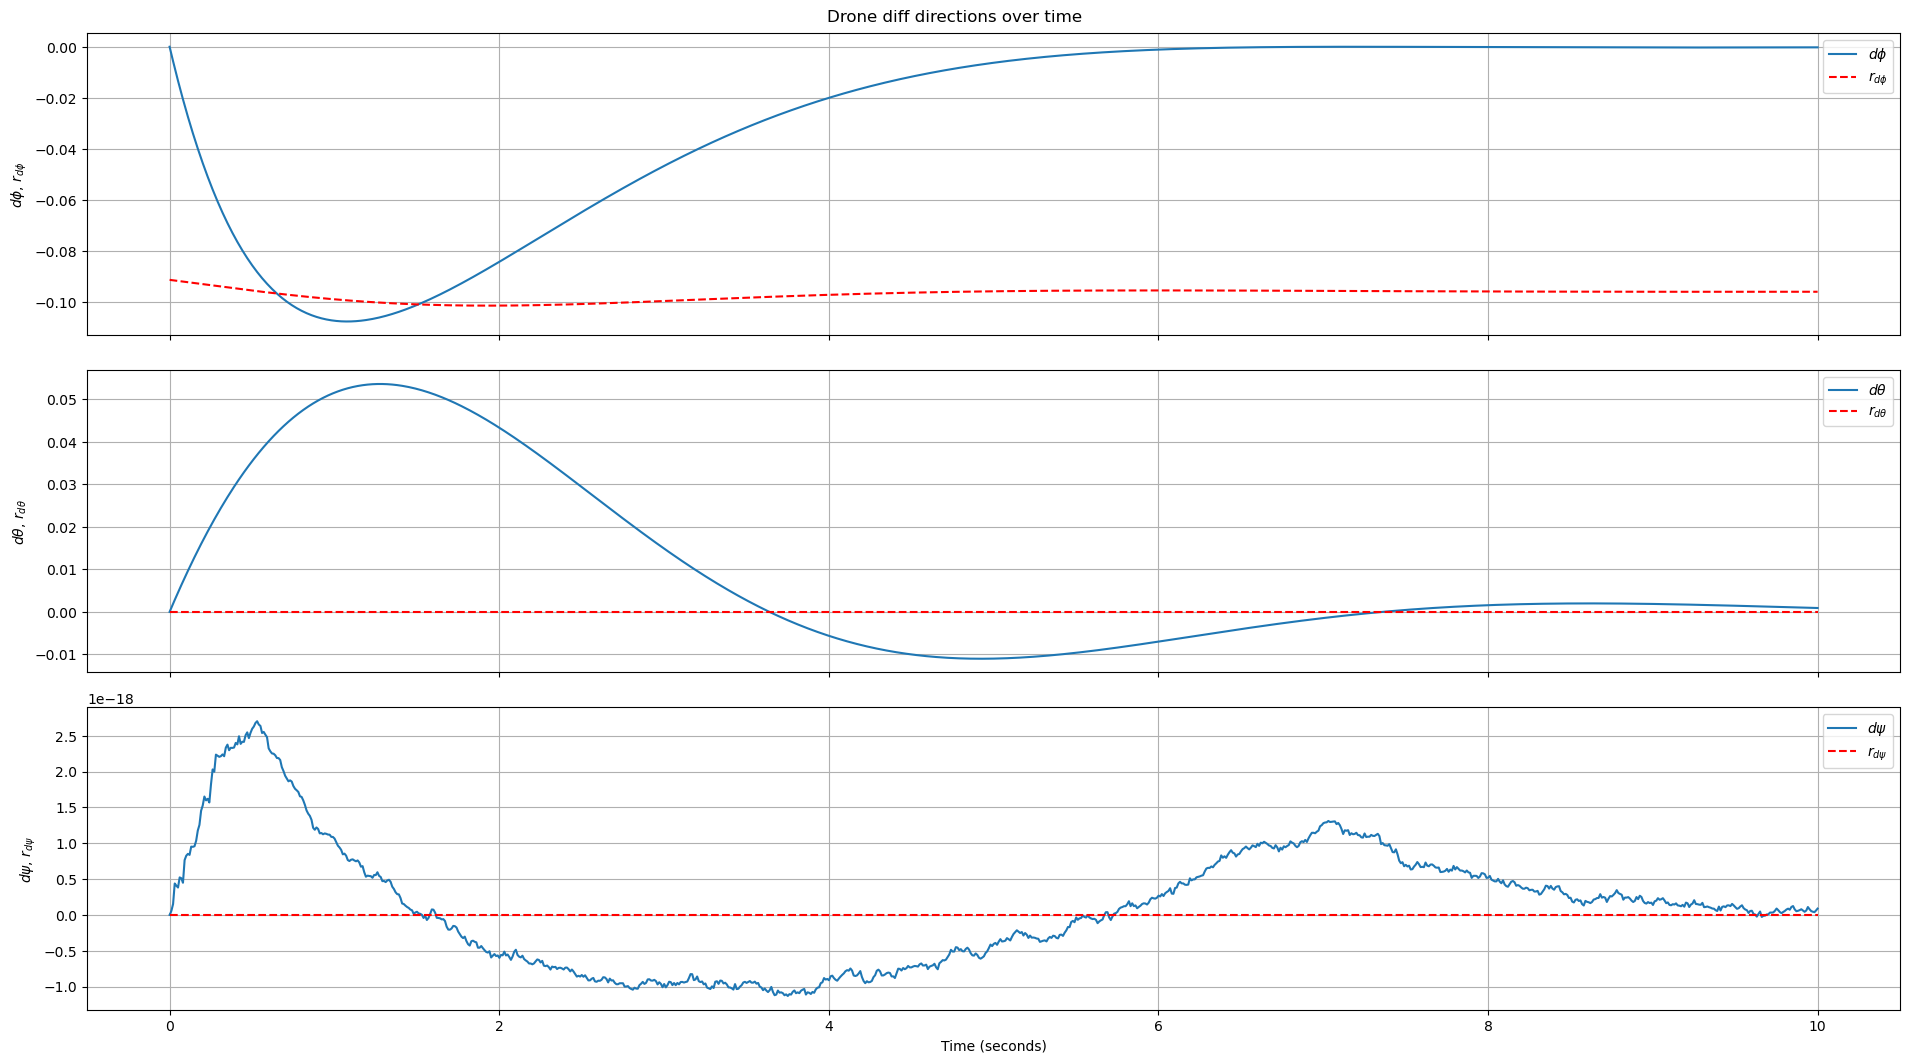

In [39]:
time_plot(['dphi', 'dtheta', 'dpsi'], sim_out, title='Drone diff directions over time')

## Feedback Linearized Inputs

(<Figure size 1920x1080 with 4 Axes>,
 array([<AxesSubplot:ylabel='$f$'>, <AxesSubplot:ylabel='$m_x$'>,
        <AxesSubplot:ylabel='$m_y$'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='$m_z$'>],
       dtype=object))

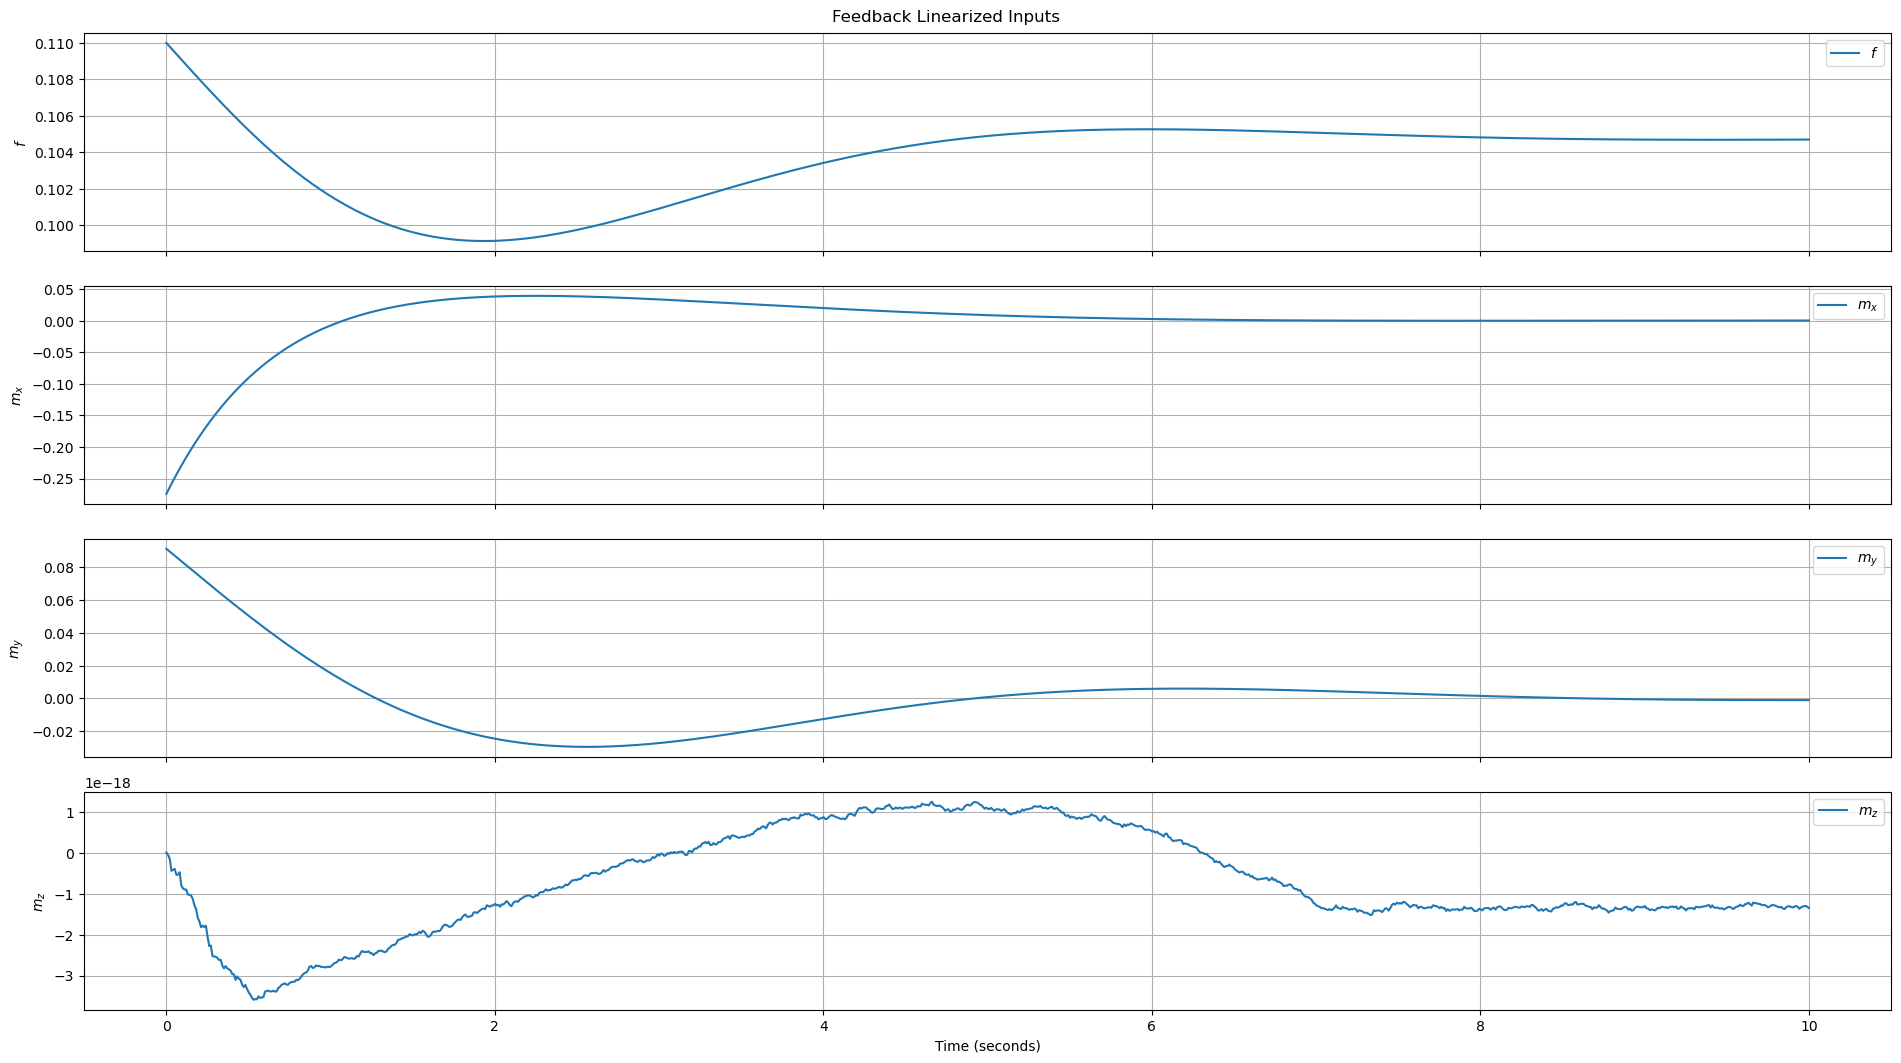

In [40]:
time_plot(['f', 'm_x', 'm_y', 'm_z'], sim_out, title='Feedback Linearized Inputs')

## State space plots

(<Figure size 1920x1080 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

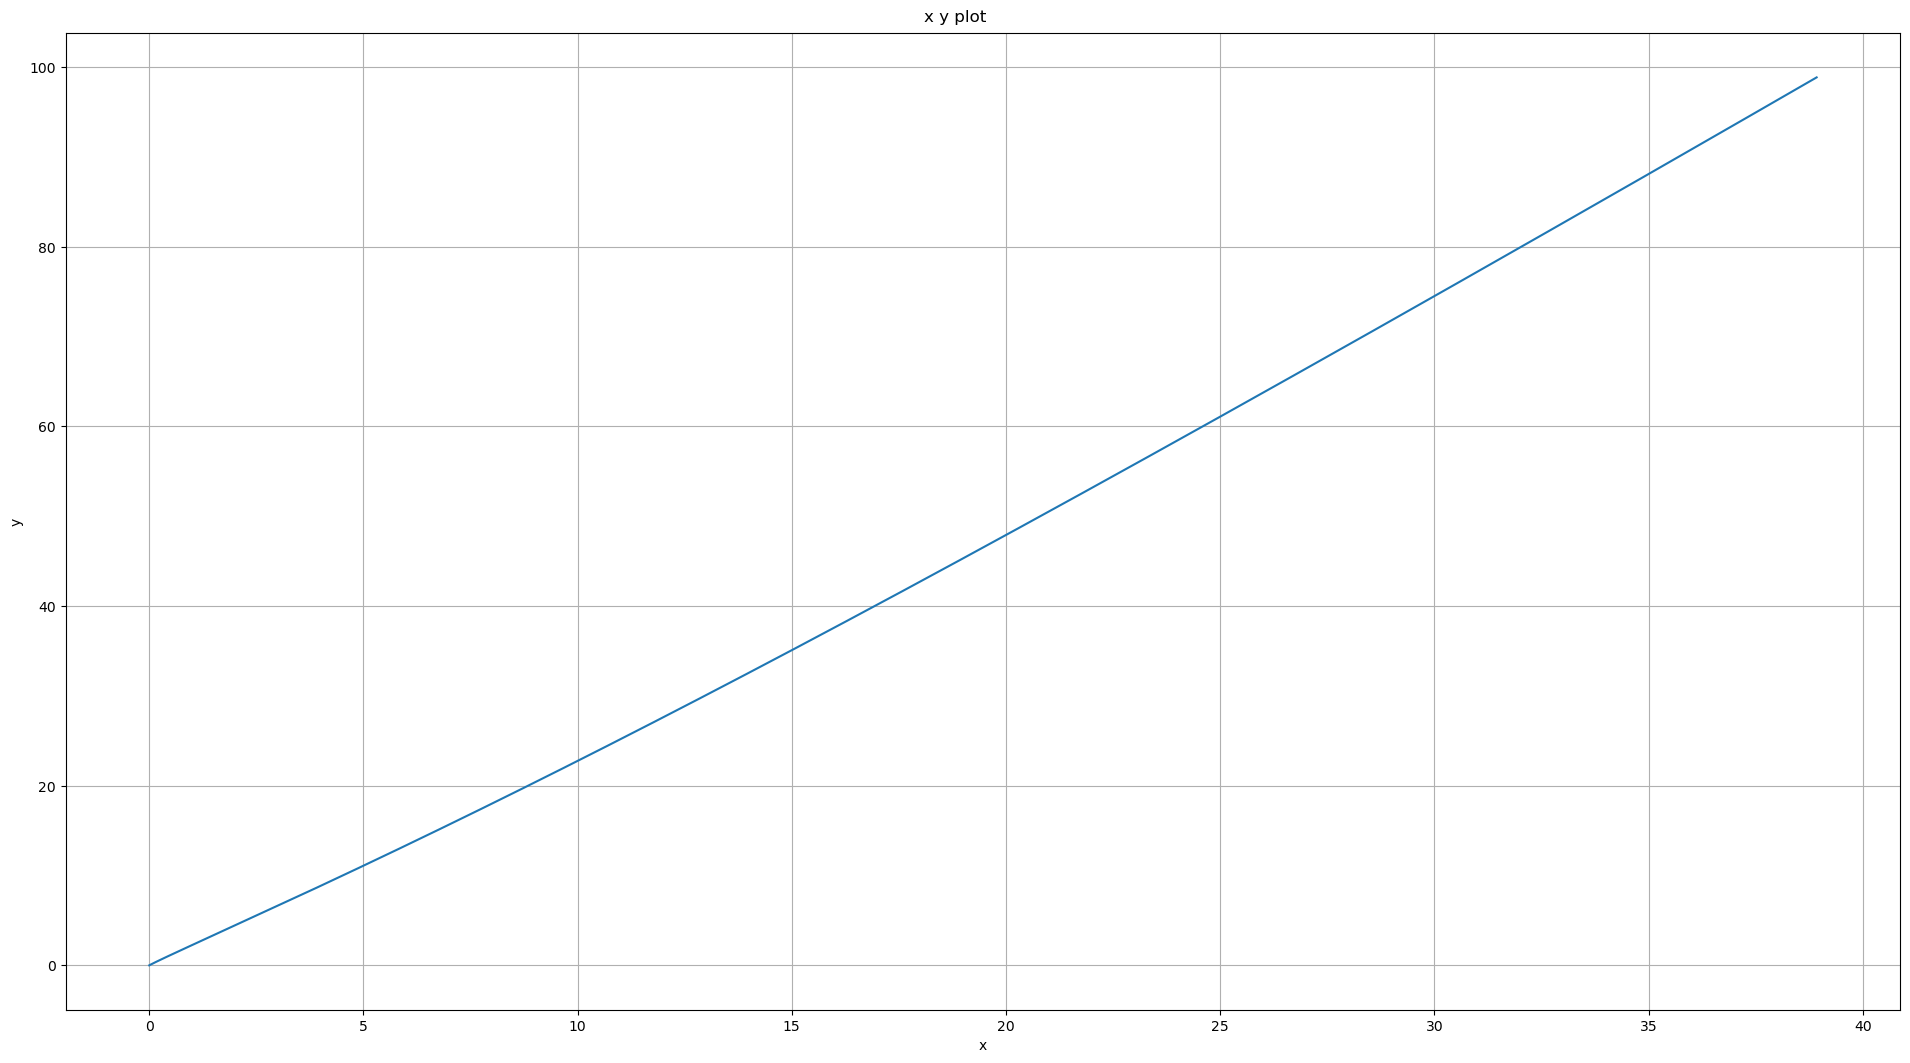

In [41]:
x='x'
y='y'
state_space_plot(x,y,sim_out, title=f'{x} {y} plot')